<a href="https://colab.research.google.com/github/neslytom/DSML-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn shap

In [ ]:
import pandas as pd

data = pd.read_csv('online_shoppers_intention.csv')

print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
print("Shape:", data.shape)

print("Missing values:\n", data.isnull().sum())

print("Data types:\n", data.dtypes)

print("Revenue distribution:\n", data["Revenue"].value_counts(normalize=True))

Shape: (12330, 18)
Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Data types:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             in

**EDA**

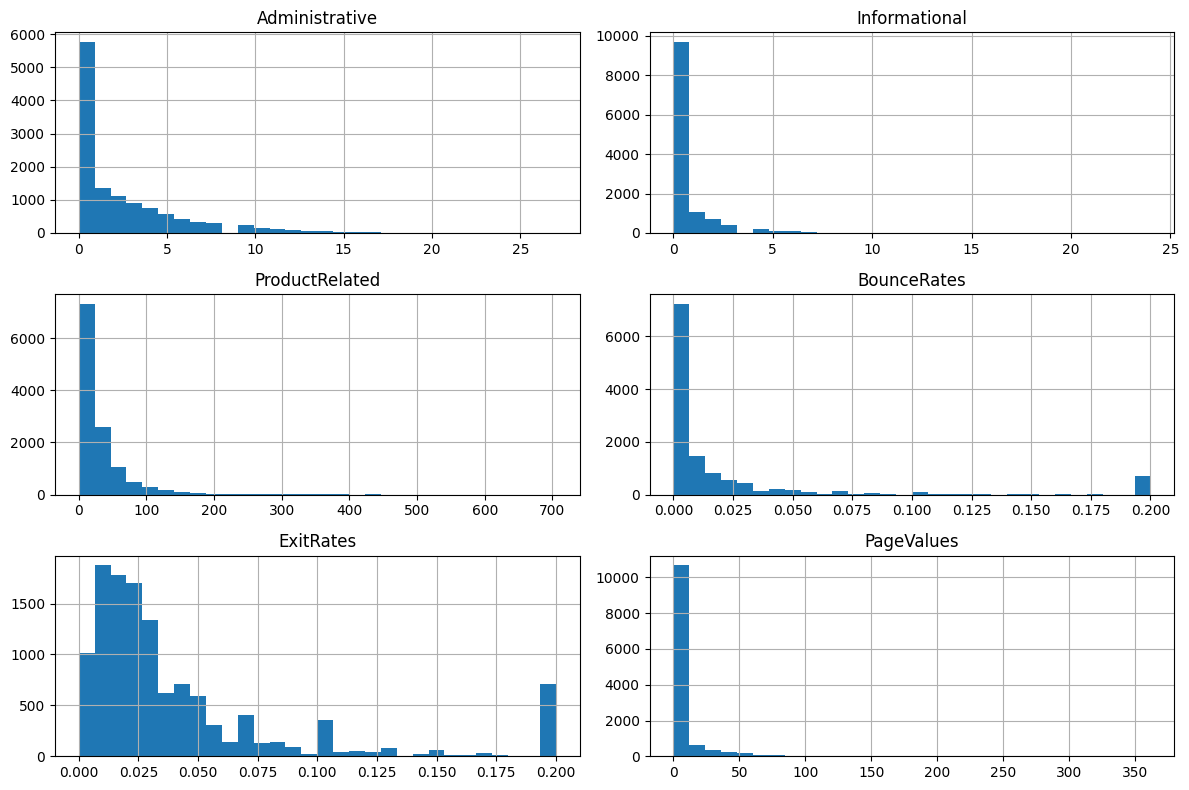

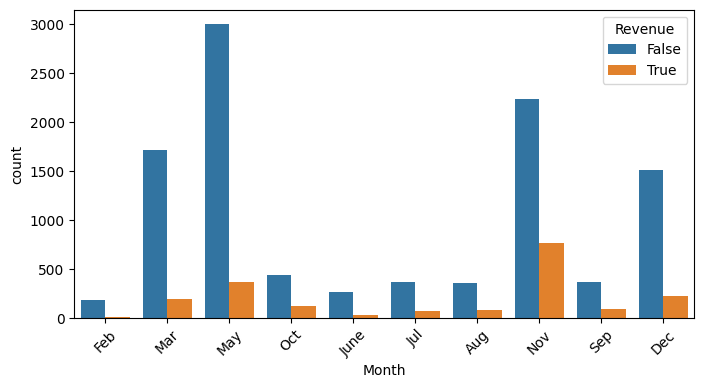

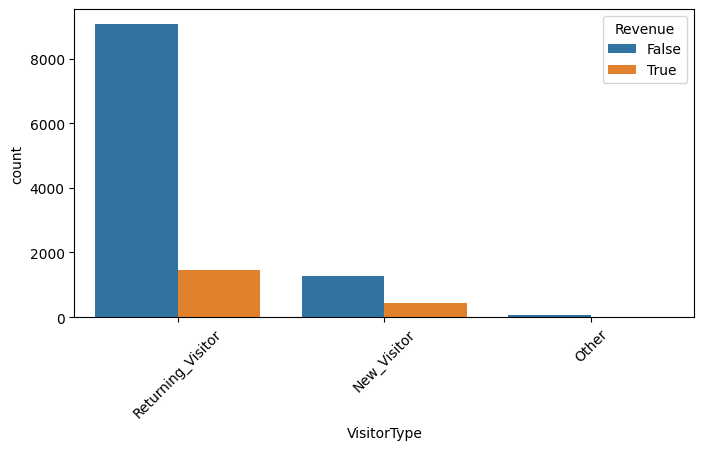

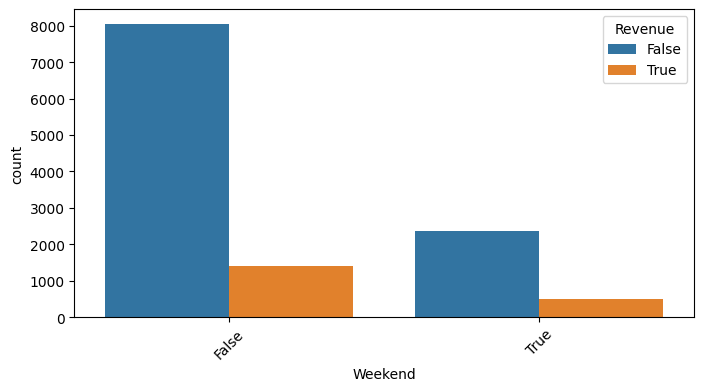

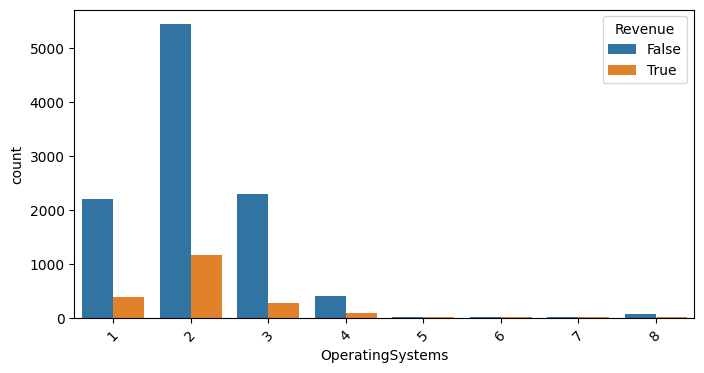

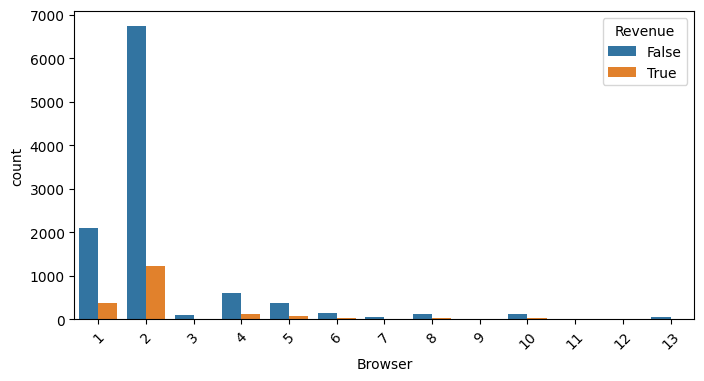

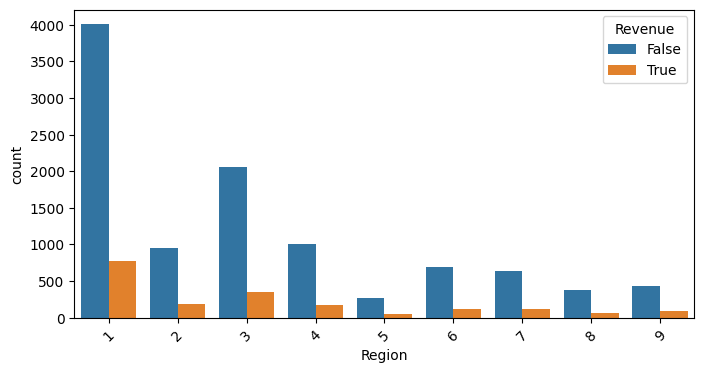

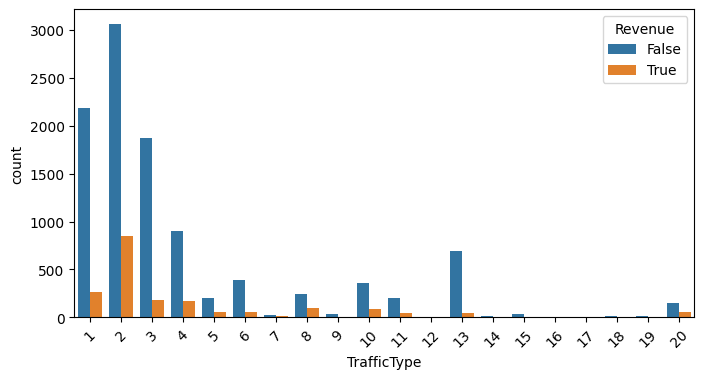

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues']
data[numerical].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


categorical = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data, hue='Revenue')
    plt.xticks(rotation=45)
    plt.show()

         Administrative  Informational  ProductRelated  BounceRates  \
Revenue                                                               
False          2.117732       0.451833       28.714642     0.025317   
True           3.393606       0.786164       48.210168     0.005117   

         ExitRates  PageValues  
Revenue                         
False     0.047378    1.975998  
True      0.019555   27.264518  


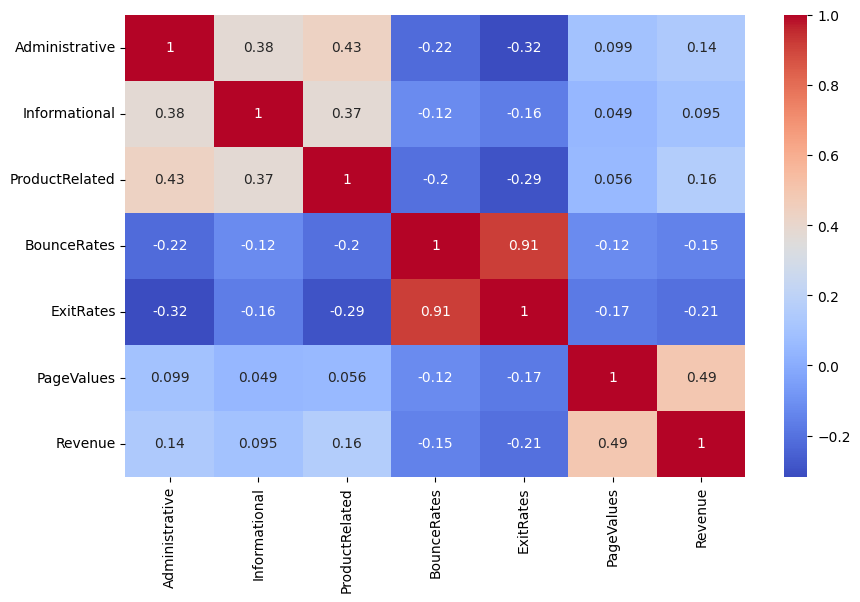

In [ ]:
print(data.groupby('Revenue')[numerical].mean())

plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical + ['Revenue']].corr(), annot=True, cmap='coolwarm')
plt.show()

<ipython-input-9-cf8809cdeb64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')


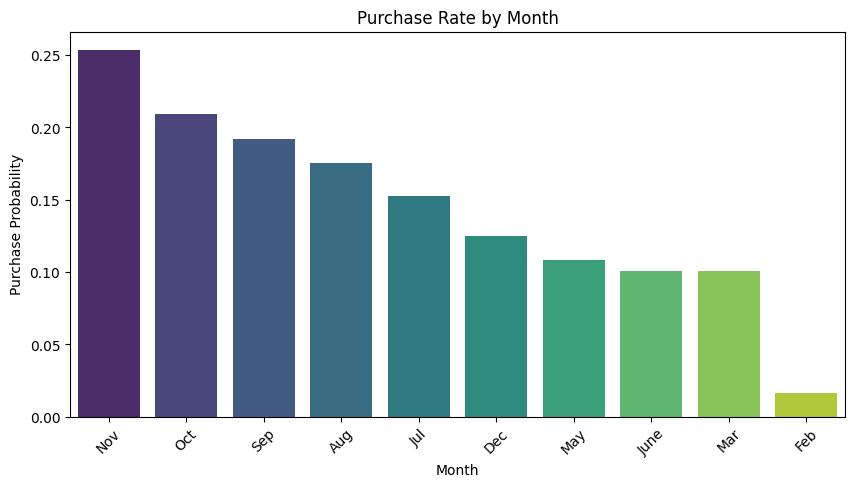

In [ ]:
monthly_revenue = data.groupby('Month')['Revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')
plt.title('Purchase Rate by Month')
plt.ylabel('Purchase Probability')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

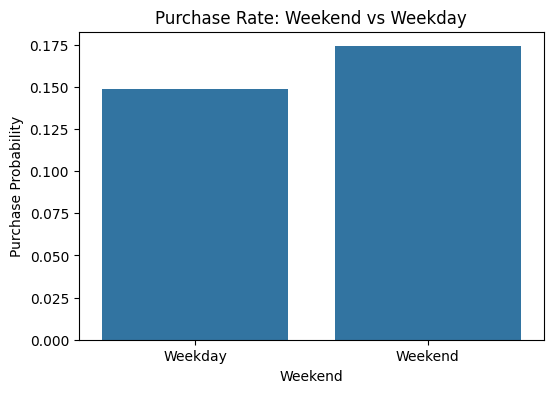

In [ ]:
weekend_revenue = data.groupby('Weekend')['Revenue'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=weekend_revenue.index, y=weekend_revenue.values)
plt.title('Purchase Rate: Weekend vs Weekday')
plt.ylabel('Purchase Probability')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

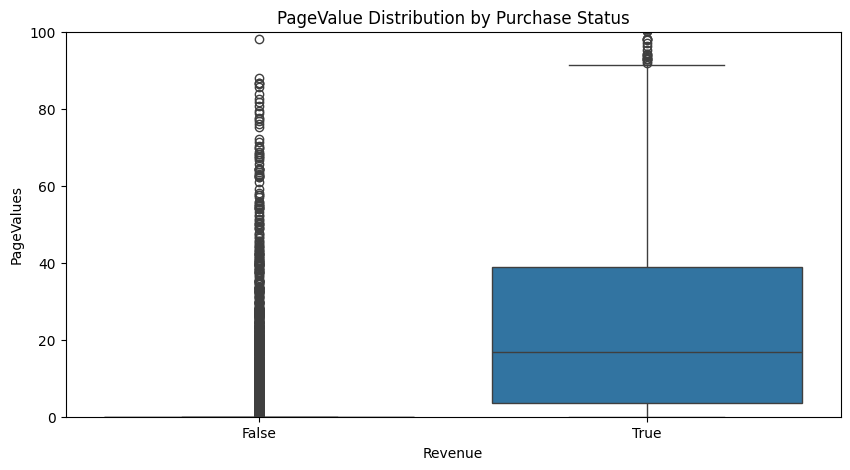

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Revenue', y='PageValues', data=data)
plt.ylim(0, 100)
plt.title('PageValue Distribution by Purchase Status')
plt.show()

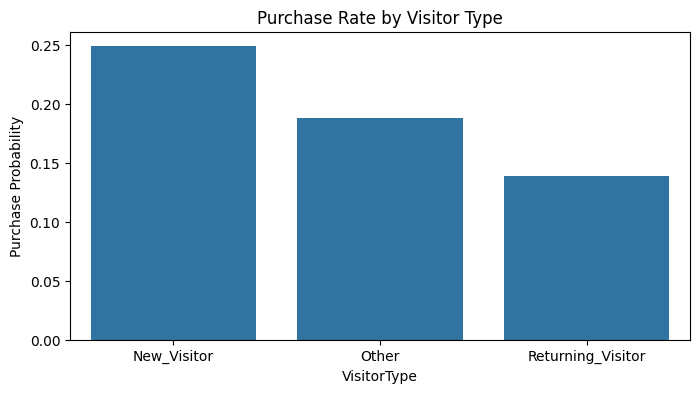

In [ ]:
visitor_revenue = data.groupby('VisitorType')['Revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=visitor_revenue.index, y=visitor_revenue.values)
plt.title('Purchase Rate by Visitor Type')
plt.ylabel('Purchase Probability')
plt.show()

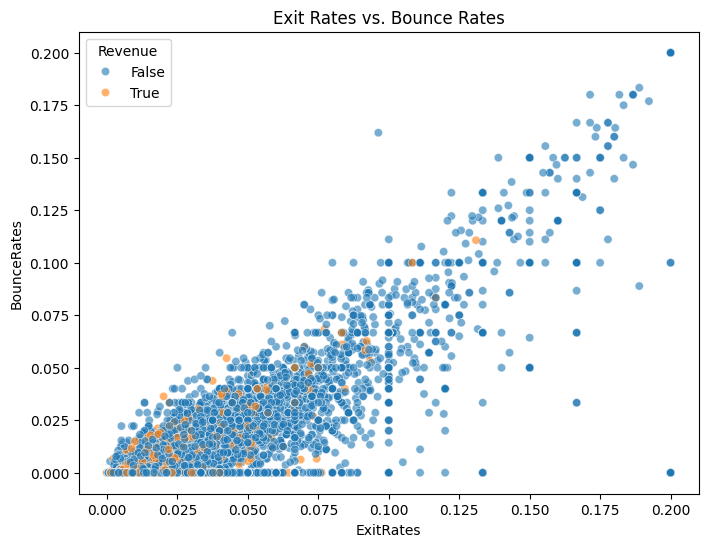

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ExitRates', y='BounceRates', hue='Revenue', data=data, alpha=0.6)
plt.title('Exit Rates vs. Bounce Rates')
plt.show()

In [ ]:
data = pd.get_dummies(data, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

print("Random Forest AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("XGBoost AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

Random Forest Report:
               precision    recall  f1-score   support

       False       0.94      0.92      0.93      2084
        True       0.62      0.70      0.66       382

    accuracy                           0.89      2466
   macro avg       0.78      0.81      0.80      2466
weighted avg       0.89      0.89      0.89      2466

XGBoost Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.93      2084
        True       0.64      0.66      0.65       382

    accuracy                           0.89      2466
   macro avg       0.79      0.80      0.79      2466
weighted avg       0.89      0.89      0.89      2466

Random Forest AUC: 0.9195610284290179
XGBoost AUC: 0.9174789721739304


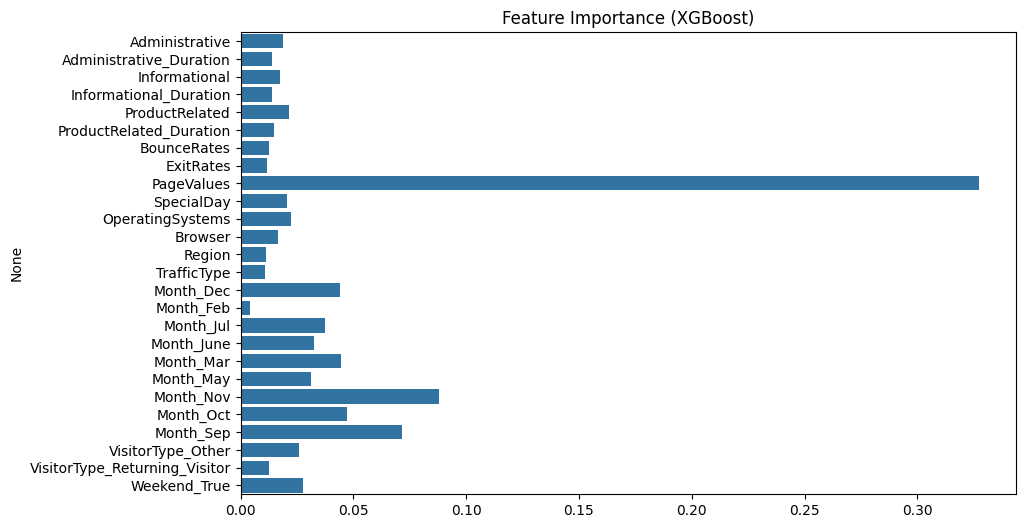

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb.feature_importances_, y=X_train.columns)
plt.title("Feature Importance (XGBoost)")
plt.show()

In [ ]:
import joblib
joblib.dump(xgb, 'shopper_intention_model.pkl')

['shopper_intention_model.pkl']

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
import matplotlib.pyplot as plt

def predict_purchase(administrative, exit_rates, page_values):

    prob = 0.2 + 0.3*page_values - 0.1*exit_rates + 0.05*administrative
    return max(0, min(1, prob))  # Clamp to 0-1

print("🛒 Purchase Probability Predictor")
admin = float(input("Administrative pages visited (0-30): "))
exit_rate = float(input("Exit rate (0-1): "))
page_value = float(input("Page value (0-200): "))

prob = predict_purchase(admin, exit_rate, page_value)
plt.figure(figsize=(5, 3))
plt.bar(['Purchase Probability'], [prob], color='skyblue')
plt.ylim(0, 1)
plt.title(f"Predicted Probability: {prob:.2%}")
plt.show()

🛒 Purchase Probability Predictor


In [ ]:
!pip install gradio

import gradio as gr
import joblib

def predict(admin, exit_rate, page_value):
    # Mock prediction
    prob = 0.2 + 0.3*page_value - 0.1*exit_rate + 0.05*admin
    return {"Purchase": float(prob), "No Purchase": 1-float(prob)}

demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Administrative Pages"),
        gr.Slider(0, 1, label="Exit Rate"),
        gr.Number(label="Page Value")
    ],
    outputs="label",
    live=True
)

demo.launch()